In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (20,10)


In [5]:
df=pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [6]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

In [7]:
mean_values = df[numerical_columns].mean()
print(mean_values)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64


In [8]:
mode_values = df[numerical_columns].mode().iloc[0]
print(mode_values)

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64


In [9]:
std_values = df[numerical_columns].std()
print(std_values)

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


A higher standard deviation indicates more spread-out data points from the mean.  the high standard deviation in Avg Price and Total Sales Value suggests significant variability in these metrics across sales transactions.

array([[<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Avg Price'}>],
       [<Axes: title={'center': 'Total Sales Value'}>,
        <Axes: title={'center': 'Discount Rate (%)'}>],
       [<Axes: title={'center': 'Discount Amount'}>,
        <Axes: title={'center': 'Net Sales Value'}>]], dtype=object)

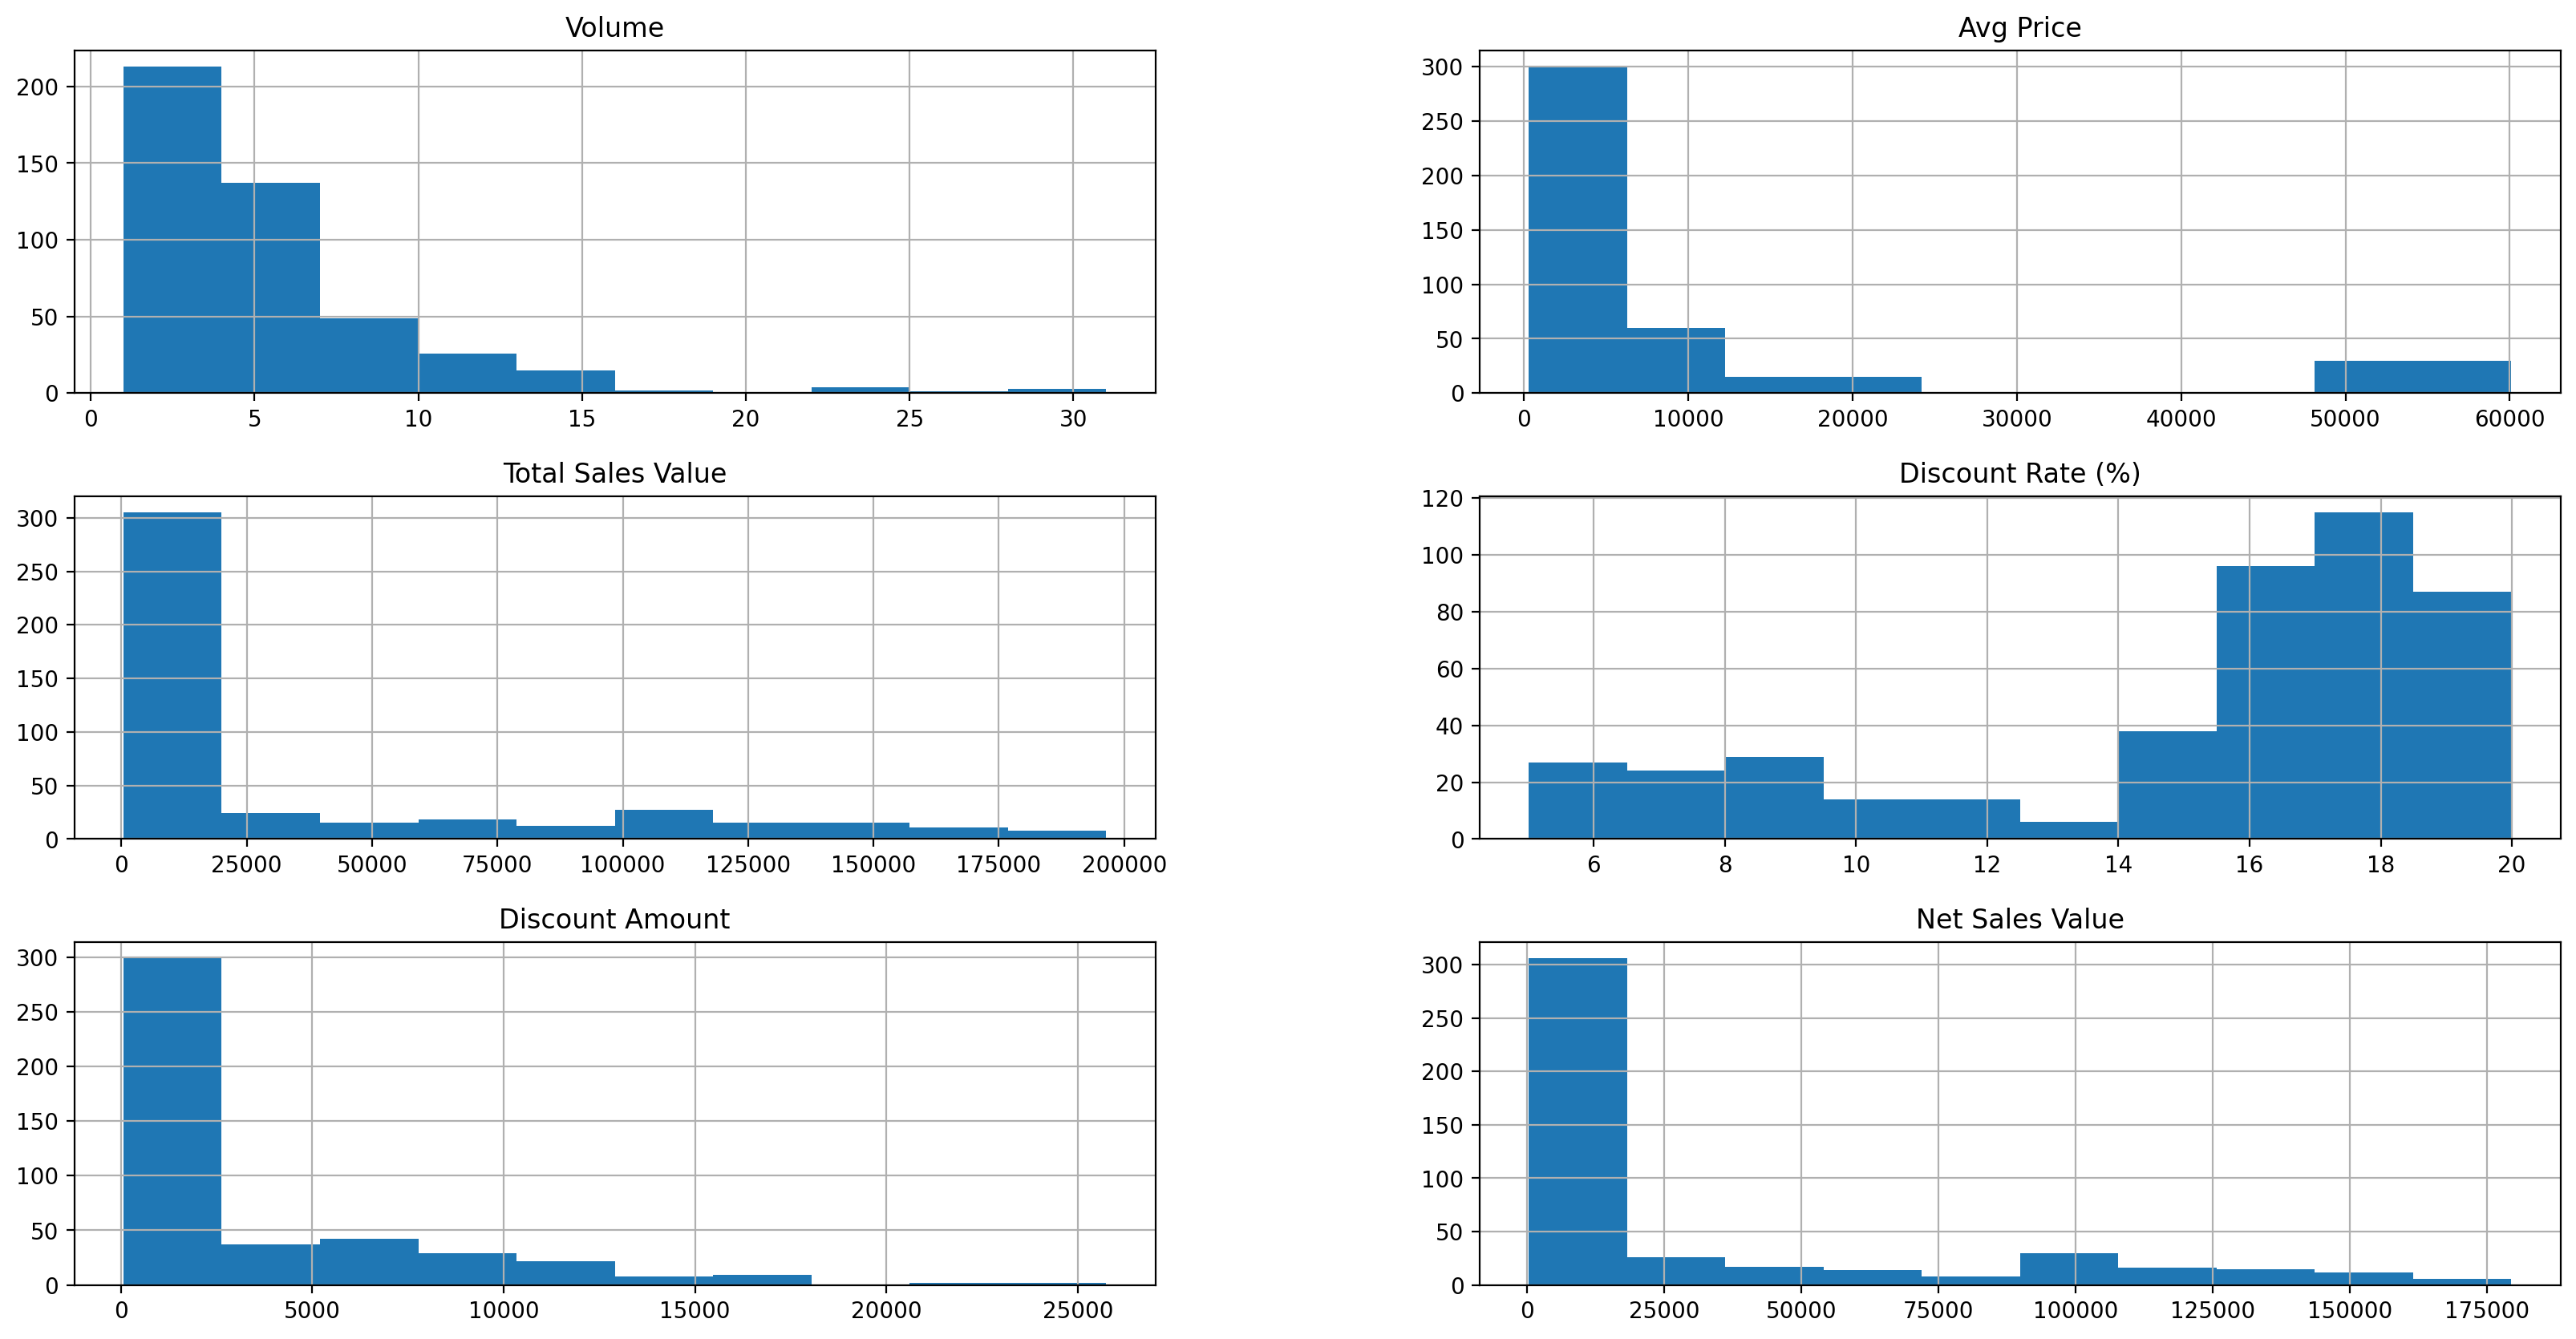

In [10]:
df.hist()

in discount rate coulumn the date is left skwede and also outliers are present. in value,avg price,discount amount, net sales value are right skwede

<Axes: >

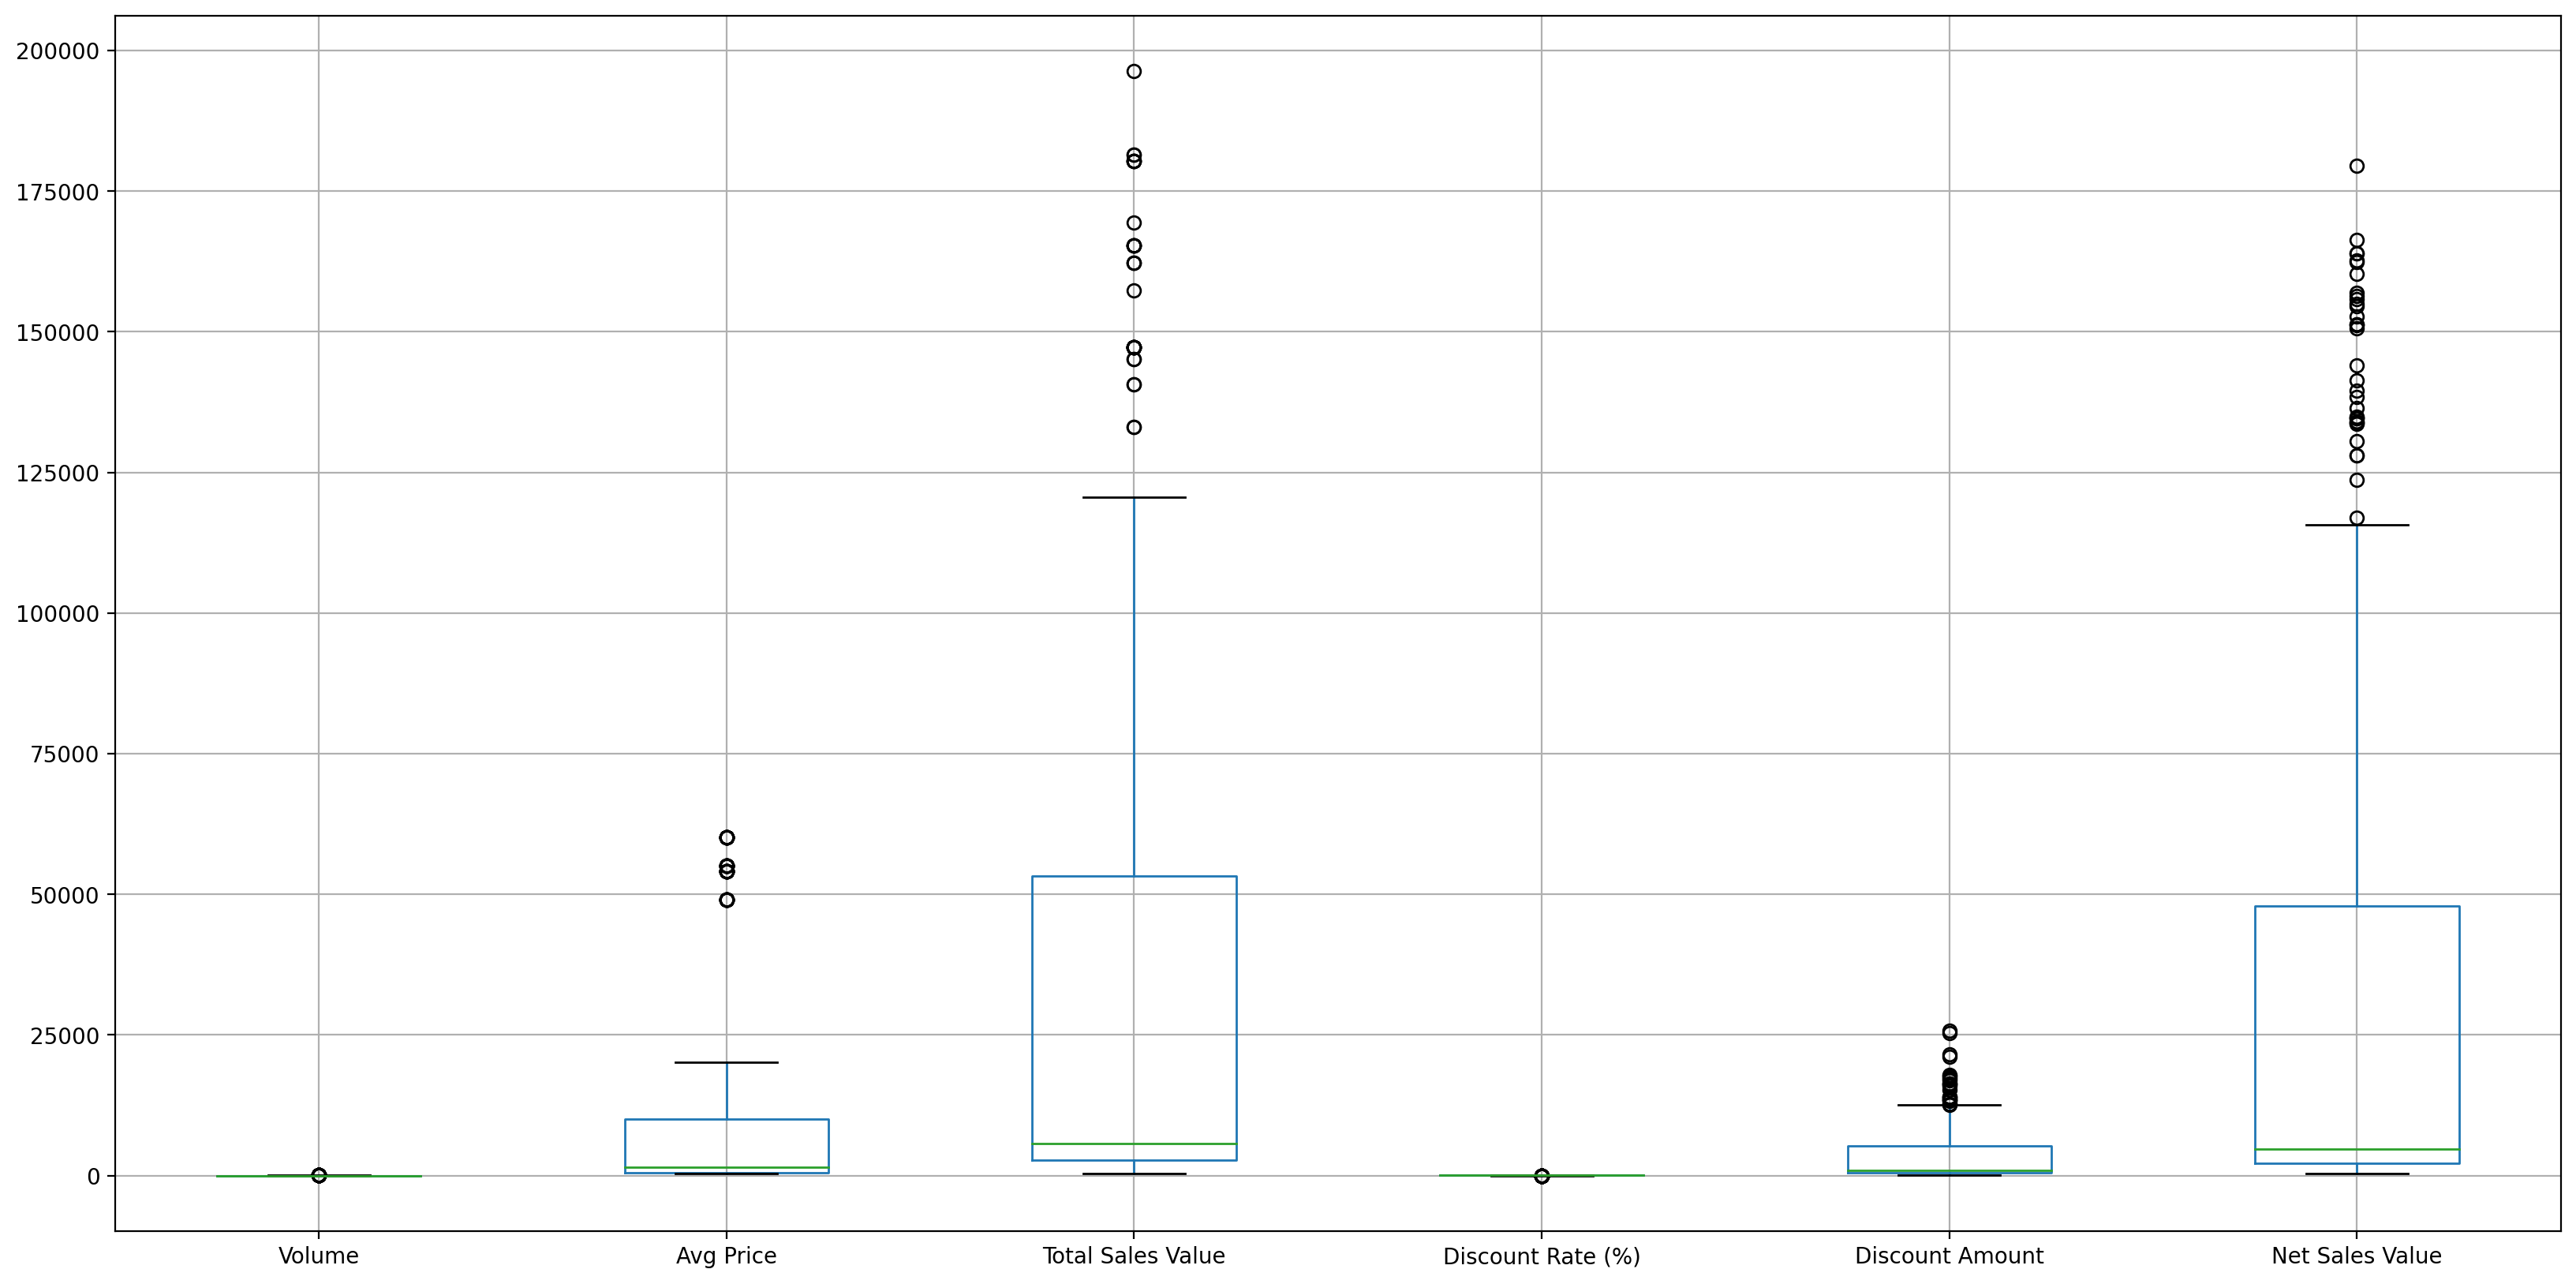

In [11]:
df.boxplot()

 box plots are useful for  the distribution of data.A few data points are located above the upper whisker.
outliers would appear as individual data points outside the whiskers of the box plot. Visually, they would stand out from the rest of the data, indicating extreme values.

<Axes: xlabel='Brand'>

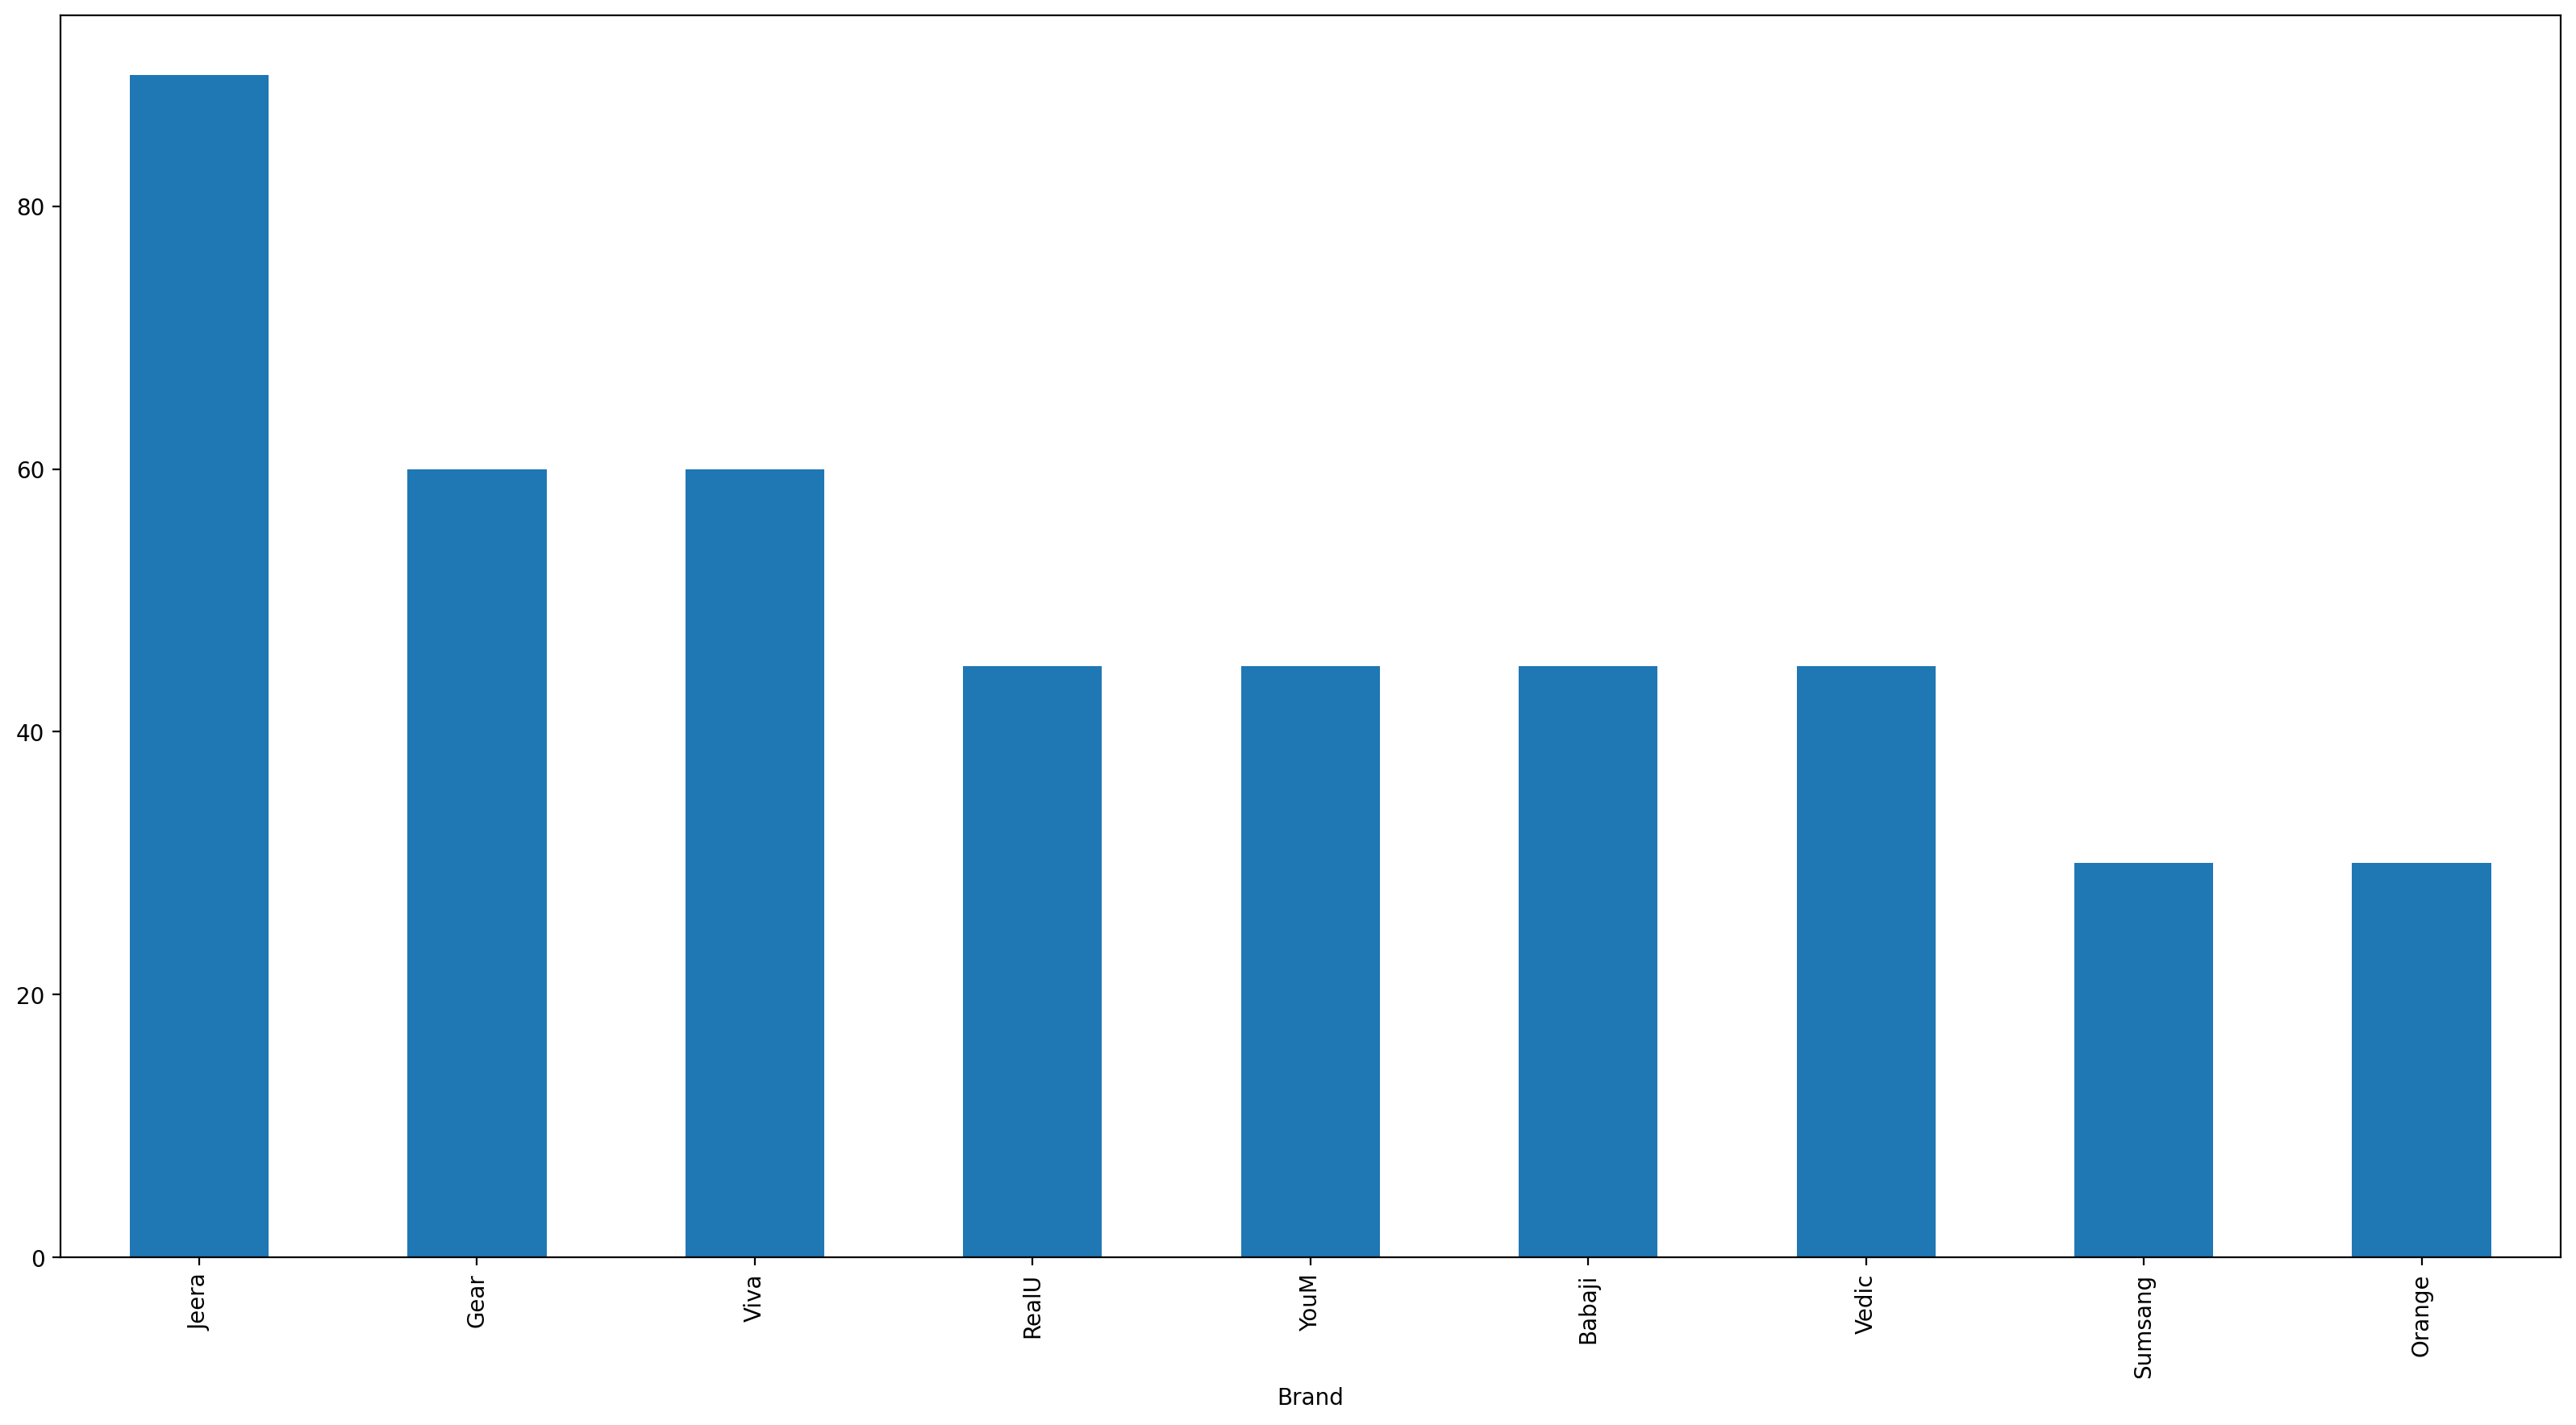

In [12]:
df['Brand'].value_counts().plot.bar()

<Axes: xlabel='BU'>

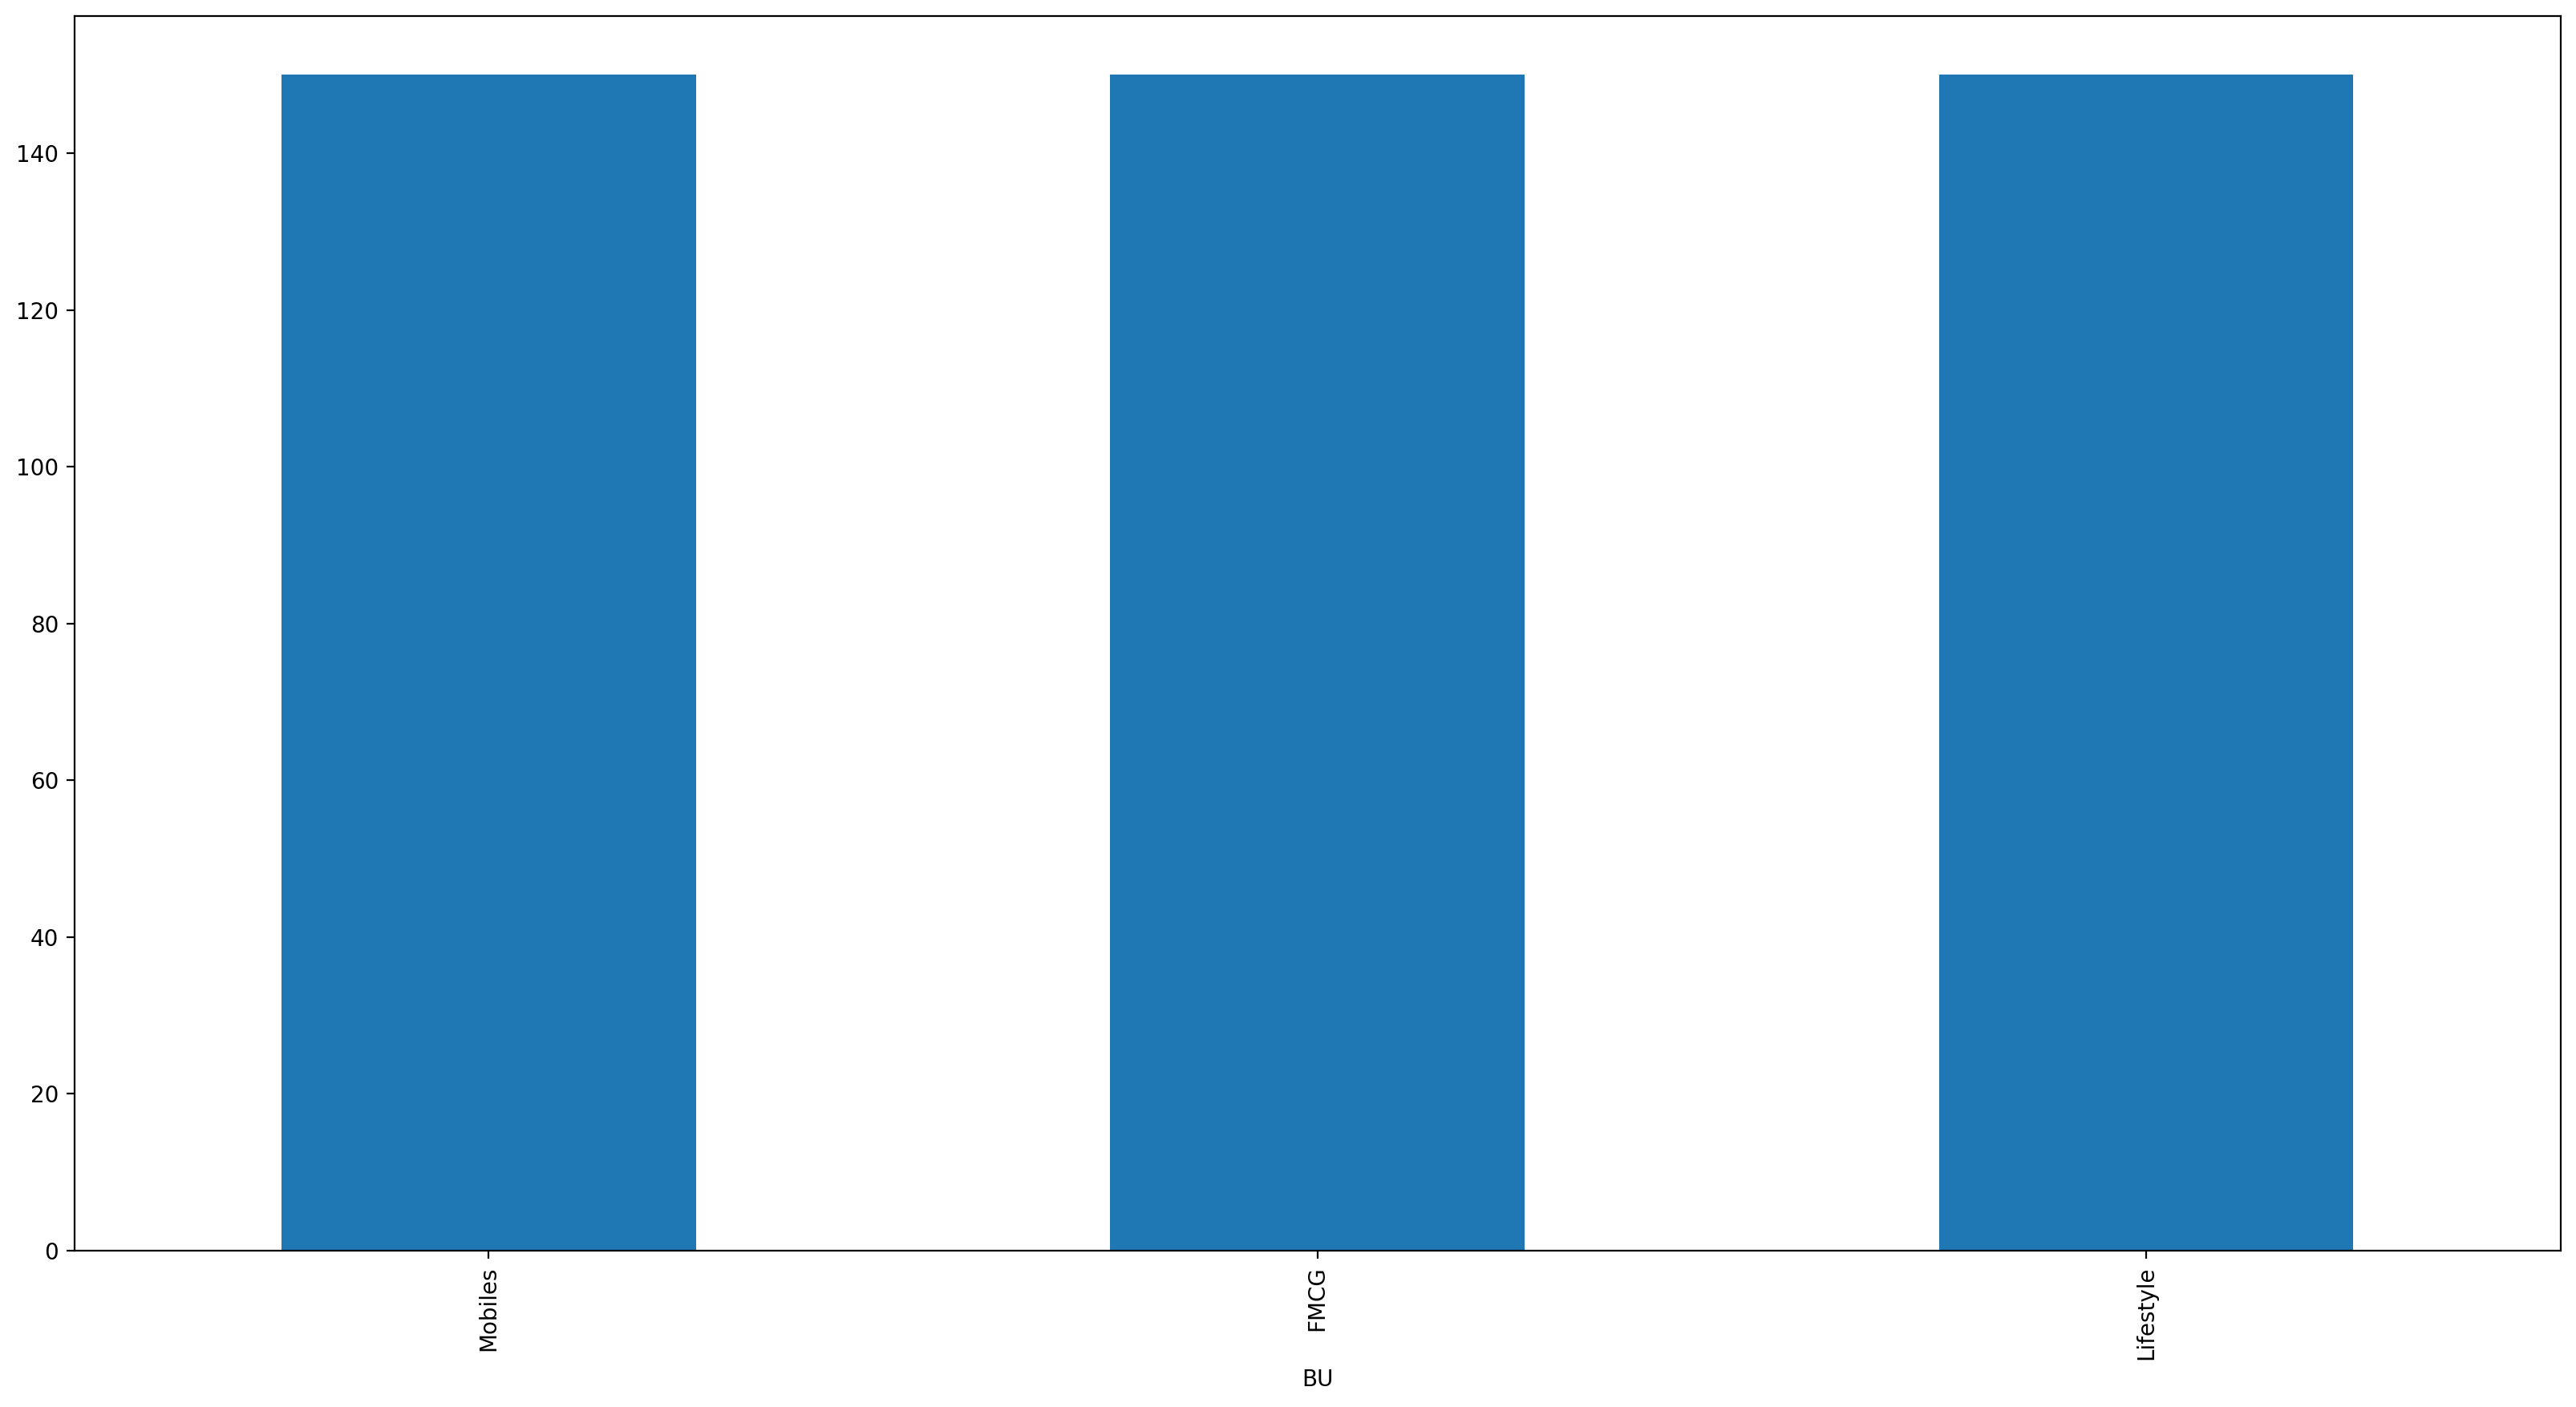

In [13]:
df['BU'].value_counts().plot.bar()

mobile,FMCG,Lifestyle have same freaquncy and count

<Axes: xlabel='Model'>

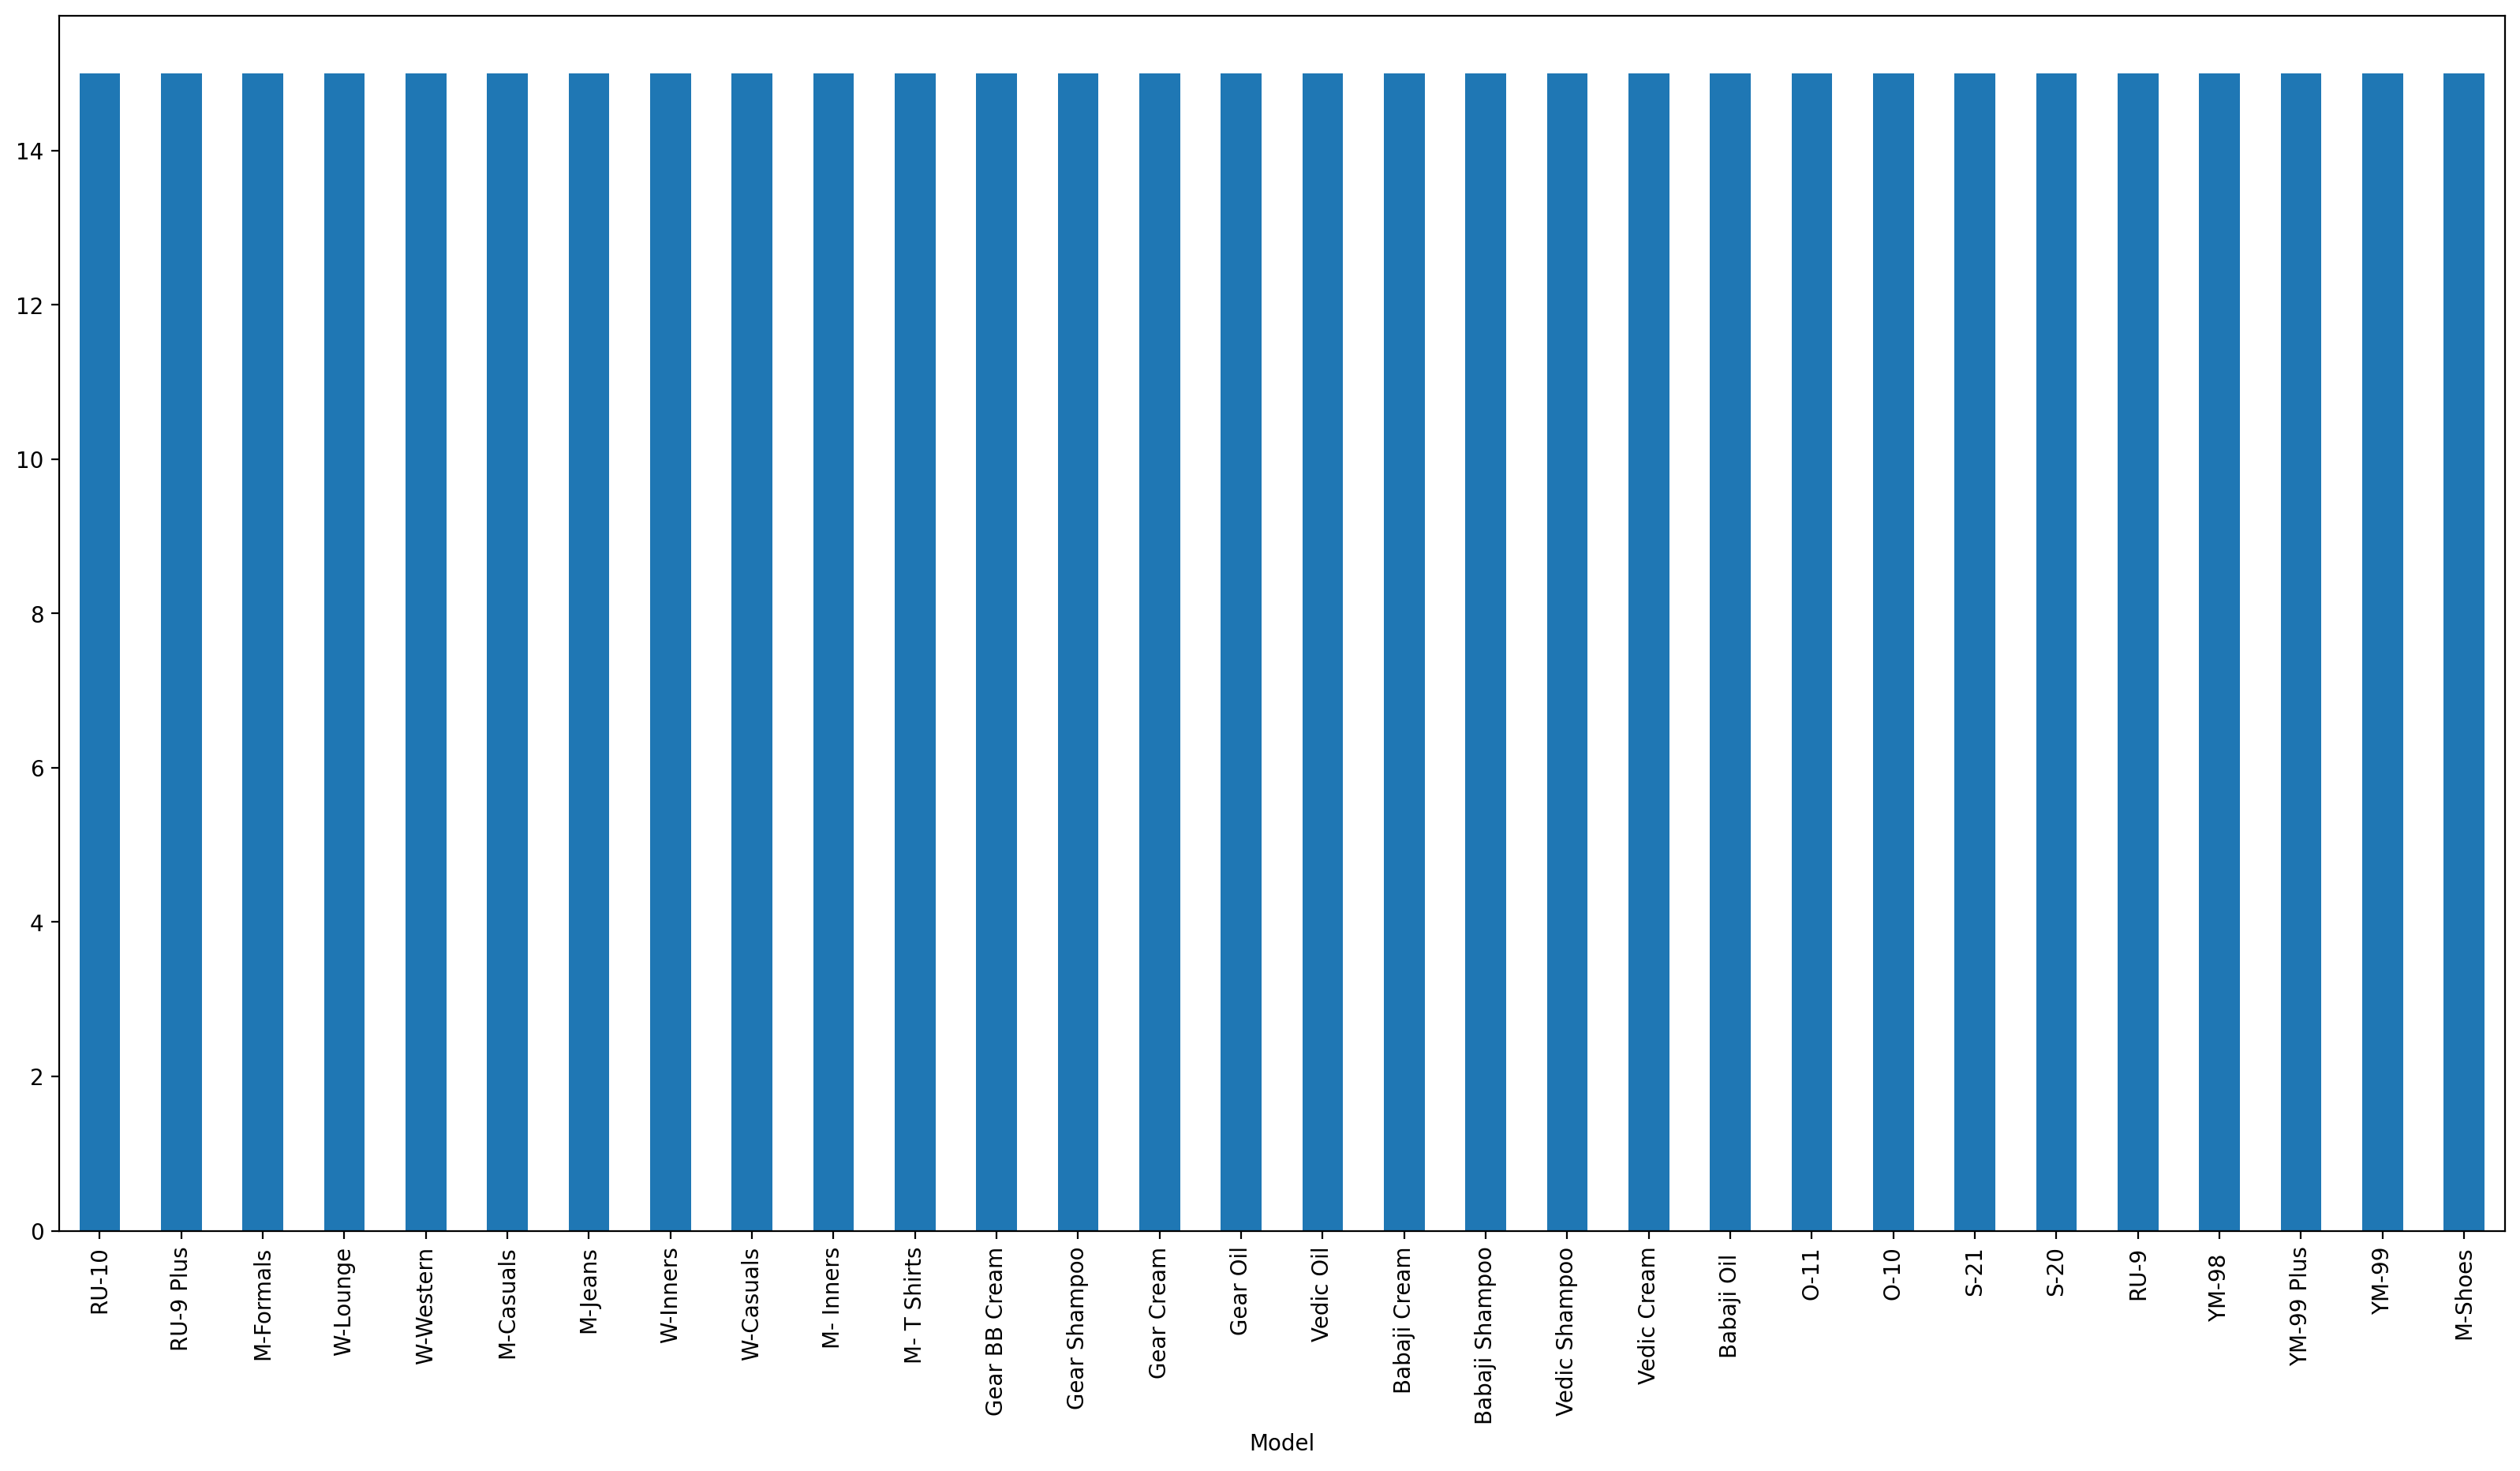

In [14]:
df['Model'].value_counts().plot.bar()

in model coloumn have same freaquanct and count

Standardization, also known as z-score normalization, is a technique used in statistics to rescale a dataset so that it has a mean of 0 and a standard deviation of 1. This process transforms the data to a standard scale, making it easier to compare different variables that may have different scales or units of measurement.

In [15]:
# Standardize the data
standardized_data= (df[numerical_columns]-mean_values)/std_values

print("Original data:", df)
print("Standardized data:", standardized_data)

Original data:            Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount Rate (%)  Discou

In [16]:
 df= df.copy()
categorical_columns = ['BU','Brand','Model']# List of categorical columns
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
encoded_data = OHE.fit_transform(df[categorical_columns])
print(encoded_data)

  (0, 2)	1.0
  (0, 7)	1.0
  (0, 27)	1.0
  (1, 2)	1.0
  (1, 7)	1.0
  (1, 29)	1.0
  (2, 2)	1.0
  (2, 11)	1.0
  (2, 40)	1.0
  (3, 2)	1.0
  (3, 11)	1.0
  (3, 41)	1.0
  (4, 2)	1.0
  (4, 11)	1.0
  (4, 39)	1.0
  (5, 2)	1.0
  (5, 7)	1.0
  (5, 28)	1.0
  (6, 2)	1.0
  (6, 8)	1.0
  (6, 30)	1.0
  (7, 2)	1.0
  (7, 8)	1.0
  (7, 31)	1.0
  (8, 2)	1.0
  :	:
  (441, 19)	1.0
  (442, 1)	1.0
  (442, 10)	1.0
  (442, 35)	1.0
  (443, 1)	1.0
  (443, 10)	1.0
  (443, 36)	1.0
  (444, 1)	1.0
  (444, 5)	1.0
  (444, 23)	1.0
  (445, 1)	1.0
  (445, 5)	1.0
  (445, 21)	1.0
  (446, 1)	1.0
  (446, 10)	1.0
  (446, 38)	1.0
  (447, 1)	1.0
  (447, 10)	1.0
  (447, 37)	1.0
  (448, 1)	1.0
  (448, 5)	1.0
  (448, 22)	1.0
  (449, 1)	1.0
  (449, 5)	1.0
  (449, 24)	1.0


In [17]:
'''Sales Metrics:
Average volume sold per transaction is around 5.07 units.
The average price per unit sold is approximately $10,453.43, with significant variability.
The total sales value varies widely, with an average of $33,812.84.
Discounts are common, with an average discount rate of approximately 15.16% and an average discount amount of $3,346.50.

 Categorical variables like Business Unit (BU), Brand, and Model likely play a significant role in sales.

 Standardization scales numerical features to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the analysis.
 One-hot encoding is essential for algorithms that cannot directly process categorical data, such as linear regression, logistic regression, and neural networks.'''

'Sales Metrics:\nAverage volume sold per transaction is around 5.07 units.\nThe average price per unit sold is approximately $10,453.43, with significant variability.\nThe total sales value varies widely, with an average of $33,812.84.\nDiscounts are common, with an average discount rate of approximately 15.16% and an average discount amount of $3,346.50.\n\n Categorical variables like Business Unit (BU), Brand, and Model likely play a significant role in sales.\n\n Standardization scales numerical features to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the analysis.\n One-hot encoding is essential for algorithms that cannot directly process categorical data, such as linear regression, logistic regression, and neural networks.'

In summary, data preprocessing steps like standardization and one-hot encoding are critical for preparing data for analysis and machine learning. They ensure that the data is in a suitable format for algorithms to learn from and help prevent biases or inaccuracies in the results.